In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('data-2.csv')

In [ ]:
len(df)

105

In [ ]:
df.head()

,month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


<Axes: >

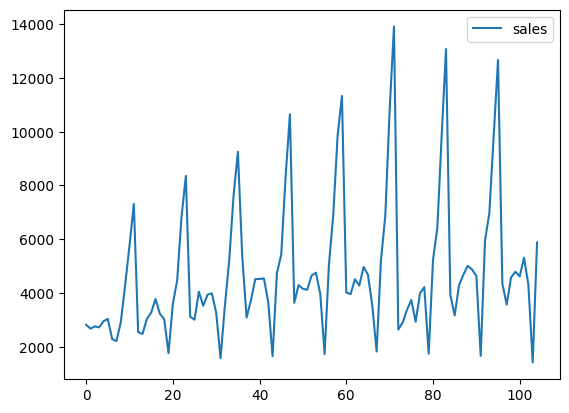

In [ ]:
df.plot()

<Axes: xlabel='month'>

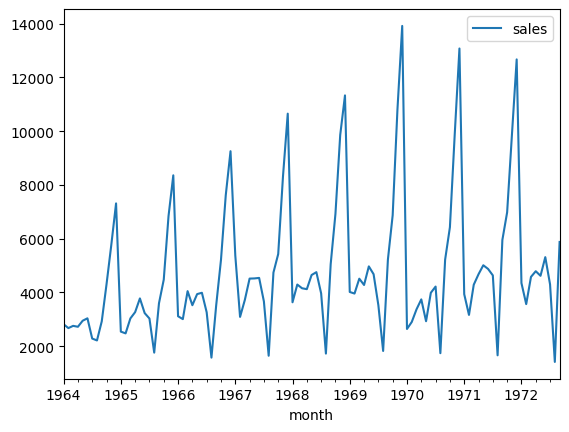

In [ ]:
df.month=pd.to_datetime(df.month)
df.set_index('month',inplace=True)
df.plot()

Dickies fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
import numpy as np
x=np.linspace(0,10,100)
y=sin(x)

NameError: name 'sin' is not defined

Differencing

In [ ]:
df.sales.shift(1)

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [ ]:
df['diff1'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df.sales.shift(12)

month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: sales, Length: 105, dtype: float64

In [ ]:
df['diff12'] = df['sales'] - df['sales'].shift(12)

In [ ]:
import numpy as np

# Generate an array of 100 equally spaced points from 0 to 10
x = np.linspace(0, 10, 100)

# Calculate the sine of each point in the array
y = np.sin(x)

# Print the array
adfuller_test(y)

ADF Test Statistic : -785580490200320.1
p-value : 0.0
#Lags Used : 10
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df

,sales,diff1,diff12
month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
...,...,...,...
1972-05-01,4618,-170.0,-392.0
1972-06-01,5312,694.0,438.0
1972-07-01,4298,-1014.0,-335.0


In [ ]:
#again dickies fuller test
adfuller_test(df['diff12'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='month'>

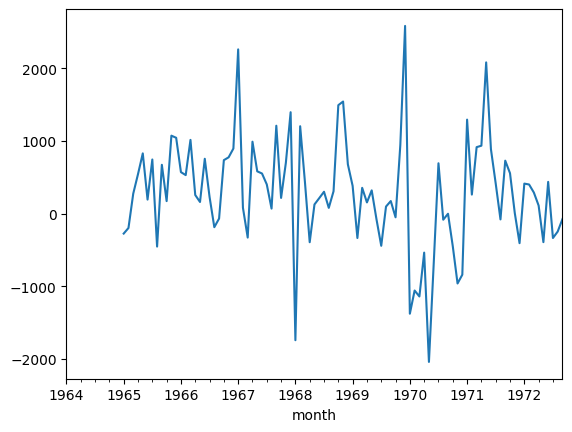

In [ ]:
df['diff12'].plot()

acf and pacf

[]

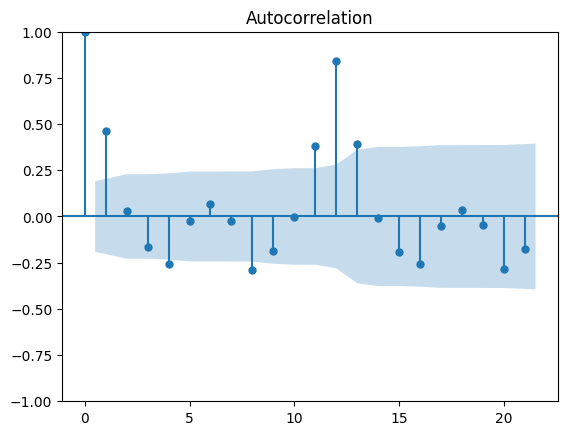

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['sales'])
plt.plot()

[]

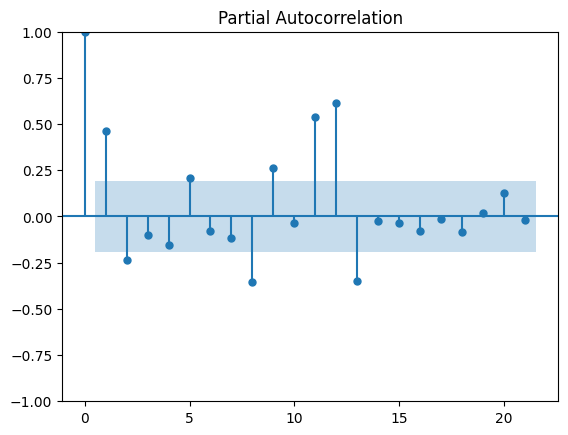

In [ ]:
plot_pacf(df['sales'])
plt.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df['sales'], order=(13,1,13))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:               ARIMA(13, 1, 13)   Log Likelihood                -853.916
Date:                Tue, 04 Jun 2024   AIC                           1761.832
Time:                        10:01:25   BIC                           1833.230
Sample:                    01-01-1964   HQIC                          1790.757
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4458      0.245     -1.816      0.069      -0.927       0.035
ar.L2         -0.0602      0.120     -0.499      0.617      -0.296       0.176
ar.L3         -0.0757      0.149     -0.509      0.611      -0.367       0.216
ar.L4         -0.0511      0.126     -0.405      0.685      -0.298       0.196
ar.L5         -0.0708      0.126     -0.562      0.574      -0.318       0.176
ar.L6         -0.0667      0.113     -0.590      0.555      -0.288       0.155
ar.L7         -0.0337      0.117     -0.287      0.774      -0.264       0.196
ar.L8         -0.0651      0.114     -0.573      0.567      -0.288       0.158
ar.L9         -0.0718      0.130     -0.551      0.582      -0.327       0.184
ar.L10        -0.0696      0.126     -0.553      0.580      -0.316       0.177
ar.L11        -0.0335      0.137     -0.245      0.807      -0.302       0.235
ar.L12         0.9085      0.128      7.122      0.000       0.658       1.158
ar.L13         0.3361      0.239      1.404      0.160      -0.133       0.805
ma.L1         -0.1506      2.931     -0.051      0.959      -5.895       5.593
ma.L2         -0.2848      6.328     -0.045      0.964     -12.688      12.118
ma.L3         -0.0778      3.032     -0.026      0.980      -6.020       5.864
ma.L4         -0.2678      7.502     -0.036      0.972     -14.972      14.436
ma.L5         -0.2138      5.634     -0.038      0.970     -11.256      10.828
ma.L6         -0.0186      5.584     -0.003      0.997     -10.963      10.926
ma.L7          0.0770      4.638      0.017      0.987      -9.013       9.167
ma.L8          0.0599      6.838      0.009      0.993     -13.343      13.463
ma.L9         -0.0032      6.620     -0.000      1.000     -12.978      12.971
ma.L10         0.1403      3.602      0.039      0.969      -6.920       7.201
ma.L11        -0.3011      5.843     -0.052      0.959     -11.753      11.151
ma.L12        -0.4323      2.343     -0.185      0.854      -5.024       4.159
ma.L13         0.7672      0.286      2.682      0.007       0.207       1.328
sigma2      4.623e+05   8.78e-05   5.26e+09      0.000    4.62e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                62.39
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.11
Prob(H) (two-sided):                  1.00   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.91e+26. Standard errors may be unstable.
"""

<Axes: xlabel='month'>

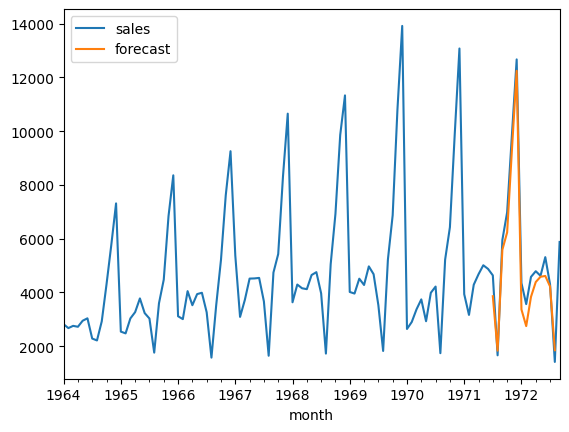

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot()

sarima

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(0, 0, 1),seasonal_order=(1,1,0,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='month'>

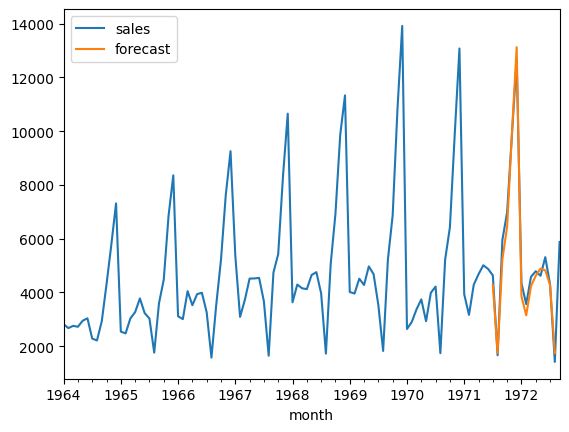

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_df=pd.concat([df,future_datest_df])

<Axes: >

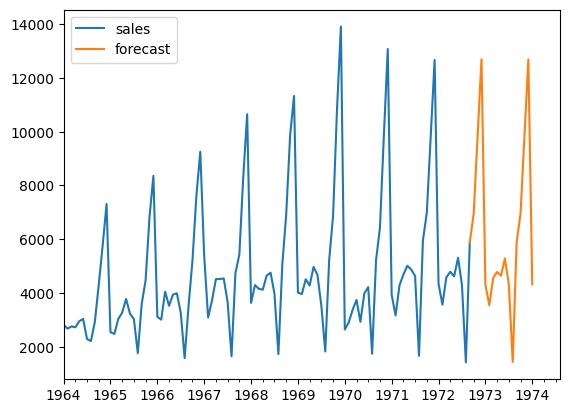

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['sales', 'forecast']].plot()

best arima model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(df.sales, seasonal=True,m=12 ,information_criterion='aic')

In [ ]:
model.order

(0, 0, 1)

In [ ]:
model.seasonal_order

(1, 1, 0, 12)